# Rosenbrock

Compile, run, and plot the result from Ros.cpp


[see this paper for different methods](https://www.semanticscholar.org/paper/Improved-traditional-Rosenbrock-Wanner-methods-for-Rang/1723a6df73a7fd445d89123007e1fcaa5fc368e6#related-papers)

Also change the makefile to compare between RODASPR2 and ROS34PW2.

In [1]:
import subprocess
import sys

import os

import time

In [2]:
import numpy as np

import matplotlib
#matplotlib.use('WebAgg')
#matplotlib.use('Qt4Cairo')
#matplotlib.use('Qt5Cairo')
matplotlib.use('nbAgg')
import matplotlib.pyplot as plt

plt.rcParams['font.family']='serif'
plt.rcParams['font.size']=10
plt.rcParams['mathtext.fontset']='stixsans'

In [3]:
os.chdir('..')
os.system(r'make')
os.chdir('0-test')

In [4]:
time0=time.time()

output=subprocess.check_output(["../Ros.run"]).decode(sys.stdout.encoding).split("\n")

print("time: {:10} s".format( time.time()-time0)  )


N=int(output[0])

N_del=int(output[1])
N_full=int(output[2])

solution=np.array([ i.split(' ')   for i in output[3:N+3] ] ,np.float64)

Deltas=np.array(output[N+3:N+3+N_del],np.float64)

solution_full=np.array([ i.split(' ')   for i in output[N+3+N_del:-1] ] ,np.float64)

time: 0.015715599060058594 s


In [5]:
t=solution[:,0]
y1=solution[:,1]
y2=solution[:,2]
y3=solution[:,3]


err1=solution[:,4]
err2=solution[:,5]
err3=solution[:,6]


hist=solution[:,7]



if N_full!=0:
    t_full=solution_full[:,0]
    y1_full=solution_full[:,1]
    y2_full=solution_full[:,2]
    y3_full=solution_full[:,3]

<IPython.core.display.Javascript object>


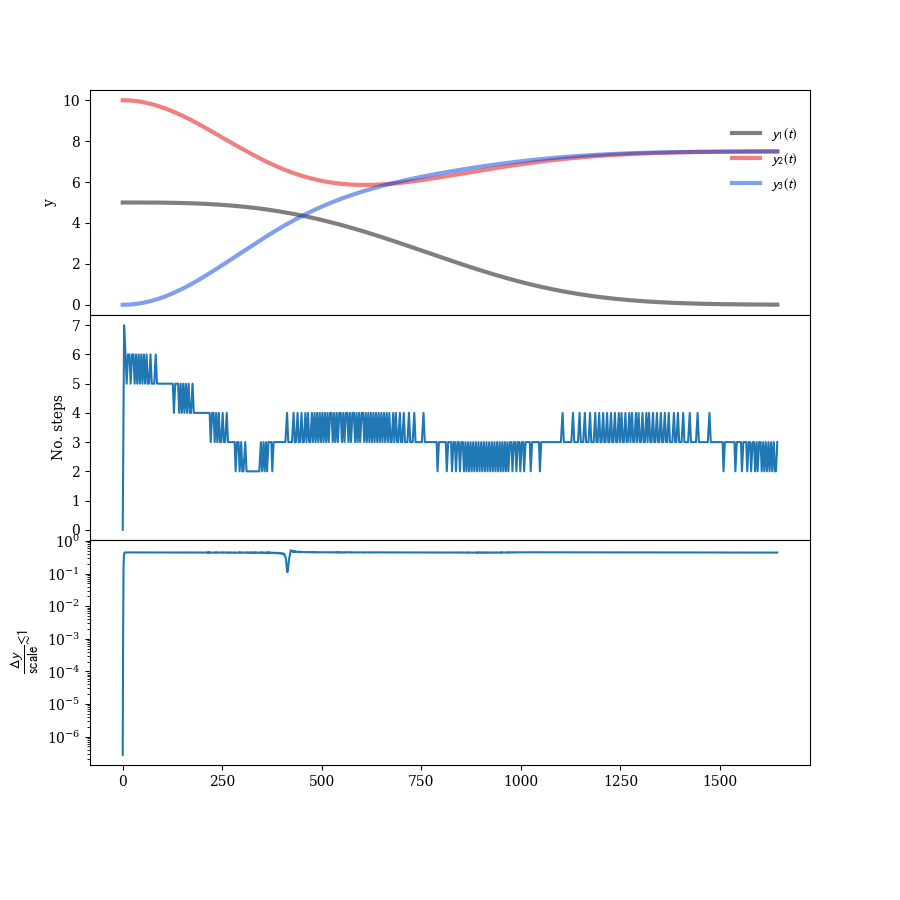

In [6]:
fig=plt.figure(figsize=(9,9))
fig.subplots_adjust(bottom=0.15, left=0.1, top = 0.9, right=0.9,wspace=0.0,hspace=0.0)
fig.suptitle('')



_c=['xkcd:black','xkcd:red','xkcd:blue']
sub = fig.add_subplot(311)

sub.plot(t,y1,c=_c[0],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{1}(t)$')
sub.plot(t,y2,c=_c[1],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{2}(t)$')
sub.plot(t,y3,c=_c[2],alpha=0.5,linestyle='-',linewidth=3,label=r'$y_{3}(t)$')




sub.legend(framealpha=0,ncol=1,loc='upper right',bbox_to_anchor=(1,.9))

sub.set_ylabel('y')   
    


sub = fig.add_subplot(312)    
sub.plot(t,hist)
sub.set_ylabel('No. steps')
sub.set_xlabel('t')  

sub = fig.add_subplot(313)    
sub.plot(Deltas)
sub.set_yscale('log')
sub.set_ylabel(r' $\dfrac{\Delta y}{\rm scale} \lesssim 1$ ')
sub.set_xlabel('')  



plt.show()

In [7]:
#see that all the points ypu get are the same
#Note: np.in1d(t_full,t) is true in all the points that exist in both t and t_full

if N_full!=0:
    print(
    set(y1_full[np.in1d(t_full,t)]-y1),
    set(y2_full[np.in1d(t_full,t)]-y2),
    set(y3_full[np.in1d(t_full,t)]-y3)
    )

In [8]:
y1[-1],y2[-1],y3[-1],

(0.006312225, 7.496083, 7.497605)